In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.sample(5)

,v1,v2
811,ham,So there's a ring that comes with the guys cos...
5274,ham,"Hi. Hope ur day * good! Back from walk, table ..."
4968,ham,I will cme i want to go to hos 2morow. After t...
4364,ham,Ujhhhhhhh computer shipped out with address to...
4762,ham,Prepare to be pleasured :)


In [7]:
df.rename(columns = {'v1':'status', 'v2':'message'}, inplace = True)
df.sample(5)

,status,message
687,ham,"Dear,Me at cherthala.in case u r coming cochin..."
1231,ham,have got * few things to do. may be in * pub l...
2375,ham,Thanx 4 2day! U r a goodmate I THINK UR RITE S...
877,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
1563,ham,Get ready to put on your excellent sub face :)


In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [9]:
df['status'] = label_encoder.fit_transform(df['status'])
df['status'].unique

<bound method Series.unique of 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: status, Length: 5572, dtype: int32>

In [10]:
df.head()

,status,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

status     0
message    0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep = 'first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

In [16]:
df['status'].value_counts()

0    4516
1     653
Name: status, dtype: int64

([<matplotlib.patches.Wedge at 0x2875b295610>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

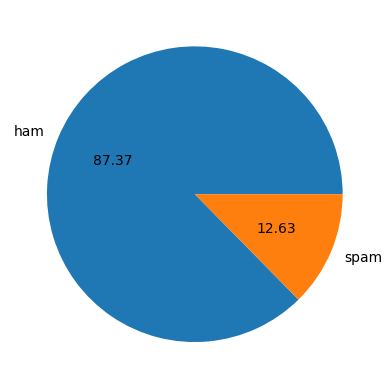

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['status'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\UPASANA
[nltk_data]     PARMARTH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters'] = df['message'].apply(len)

C:\Users\UPASANA PARMARTH\AppData\Local\Temp\ipykernel_1924\1418999995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['message'].apply(len)


In [21]:
df.head()

,status,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\UPASANA PARMARTH\AppData\Local\Temp\ipykernel_1924\1907732643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))


In [23]:
df.head()

,status,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\UPASANA PARMARTH\AppData\Local\Temp\ipykernel_1924\3645645959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [25]:
df.head()

,status,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#ham
df[df['status'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#spam
df[df['status'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

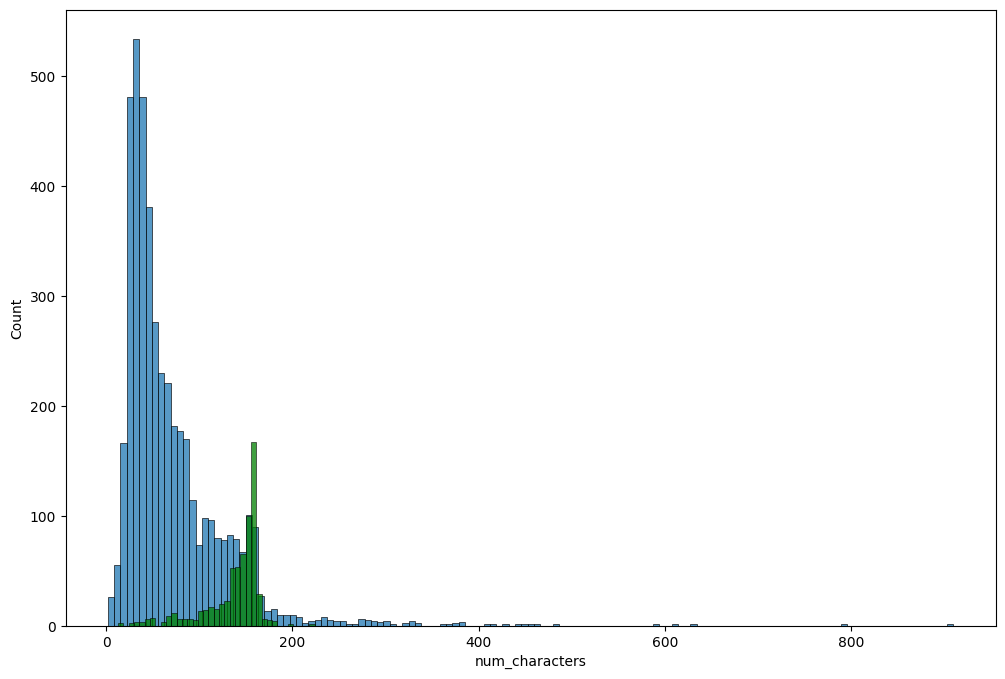

In [30]:
plt.figure(figsize = (12, 8))
sns.histplot(df[df['status'] == 0]['num_characters'])
sns.histplot(df[df['status'] == 1]['num_characters'], color = 'green')

<Axes: xlabel='num_words', ylabel='Count'>

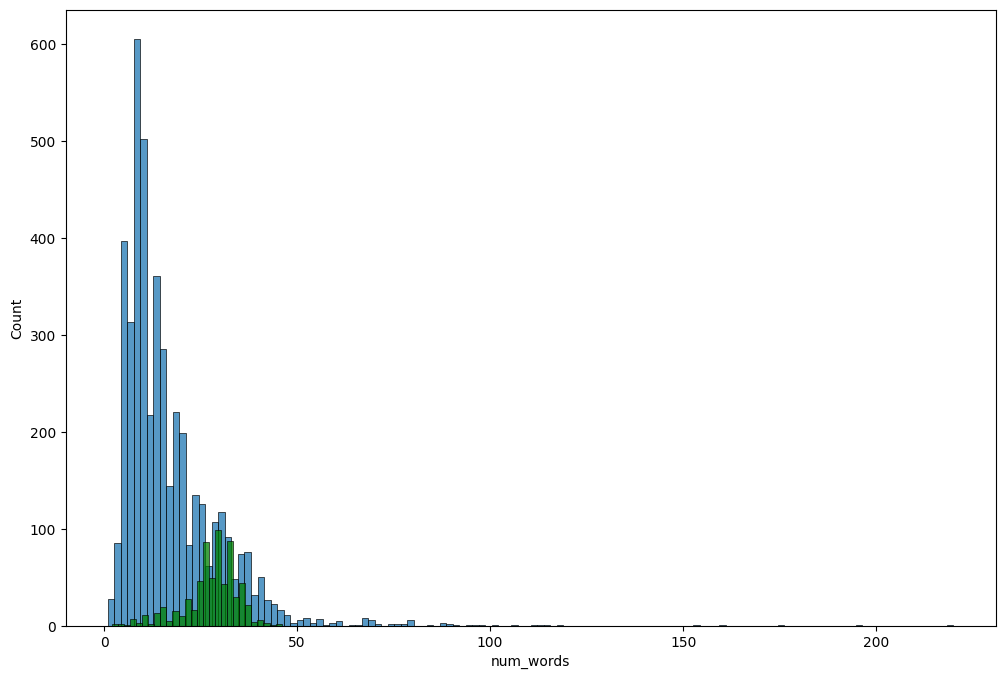

In [31]:
plt.figure(figsize = (12, 8))
sns.histplot(df[df['status'] == 0]['num_words'])
sns.histplot(df[df['status'] == 1]['num_words'], color = 'green')

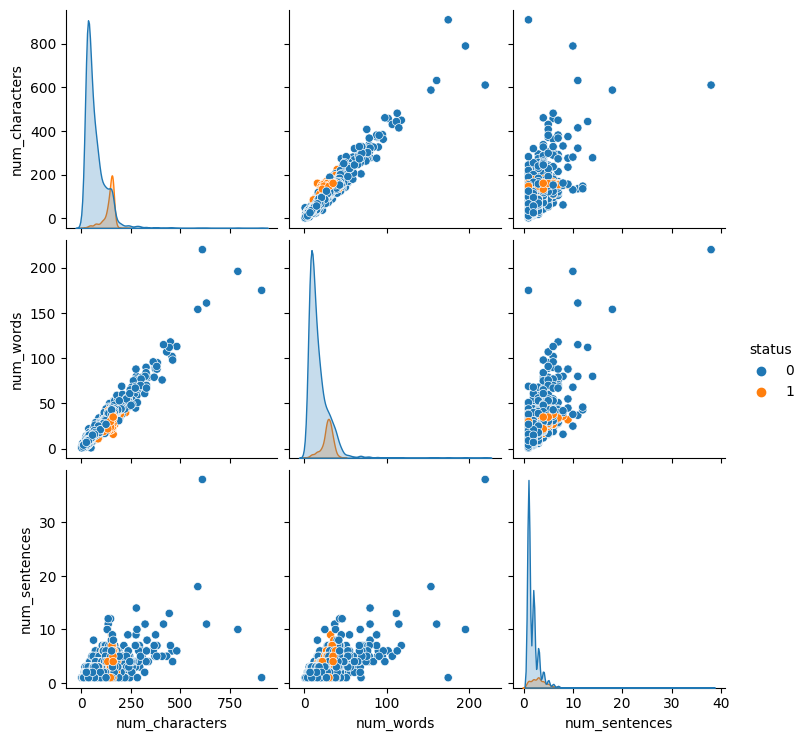

In [32]:
sns.pairplot(df, hue = 'status')

In [33]:
df.corr()

C:\Users\UPASANA PARMARTH\AppData\Local\Temp\ipykernel_1924\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,status,num_characters,num_words,num_sentences
status,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


C:\Users\UPASANA PARMARTH\AppData\Local\Temp\ipykernel_1924\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

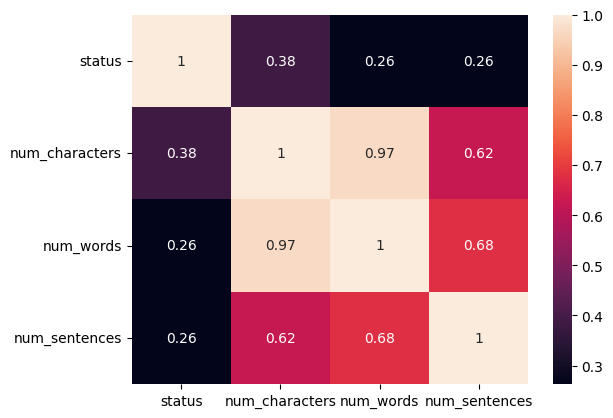

In [34]:
sns.heatmap(df.corr(), annot = True)

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\UPASANA
[nltk_data]     PARMARTH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
import string

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [43]:
from nltk.corpus import stopwords

In [44]:
def transform_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    
    y = []
    for i in message:
        if i.isalnum():
            y.append(i)
            
    message = y[:]
    y.clear()
    
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    message = y[:]
    y.clear()
    
    for i in message:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [45]:
transform_message('HELLO Parmarth #hi@kel, >shyt? rubbing')

'hello parmarth hi kel shyt rub'

In [46]:
df['transformed_message'] = df['message'].apply(transform_message)

C:\Users\UPASANA PARMARTH\AppData\Local\Temp\ipykernel_1924\818041487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_message'] = df['message'].apply(transform_message)


In [47]:
df.head()

,status,message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Using cached wordcloud-1.8.2.2.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for wordcloud
Failed to build wordcloud
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [20 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\_version.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\__init__.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\__main__.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\stopwords -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64

In [50]:
spam_corpus = []
for msg in df[df['status'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [52]:
len(spam_corpus)

9939

In [53]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [60]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [61]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [64]:
ham_corpus = []
for msg in df[df['status'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [65]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [66]:
len(ham_corpus)

35404

In [67]:
Counter(ham_corpus)

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 120,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 236,
         'amor': 1,
         'wat': 108,
         'ok': 217,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 883,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 57,
         'alreadi': 90,
         'nah': 10,
         'think': 149,
         'goe': 26,
         'usf': 10,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 77,
         'brother': 17,
         'like': 234,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [68]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [70]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [71]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [72]:
X = cv.fit_transform(df['transformed_message']).toarray()

In [73]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
X.shape

(5169, 6708)

In [75]:
y = df['status'].values

In [76]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [81]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [80]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [82]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [83]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [84]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [102]:
X = tfidf.fit_transform(df['transformed_message']).toarray()

In [103]:
X.shape

(5169, 3000)

In [104]:
y = df['status'].values

In [105]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [108]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [109]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [110]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [111]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [112]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


# comparison with diff algos

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [99]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/70.9 MB 93.5 kB/s eta 0:12:39
     ---------------------------------------- 0.0/70.9 MB 93.5 kB/s eta 0:12:39
     ---------------------------------------- 0.0/70.9 MB 93.5 kB/s eta 0:12:39
     ---------------------------------------- 0.0/70.9 MB 85.3 kB/s eta 0:13:51
     ---------------------------------------- 0.0/70.9 MB 85.3 kB/s eta 0:13:51
     ---------------------------------------- 0.0/70.9 MB 85.3 kB/s eta 0:13:51
     ---------------------------------------- 0.0/70.9 MB 85.3 kB/s eta 0:13:51
  

In [114]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))